In [1]:
from lorenz63 import *
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import mpl_toolkits.mplot3d.axes3d as p3
from scipy.signal import spectrogram, periodogram, welch
from scipy.fft import fftfreq
from lyapunov_QR import *

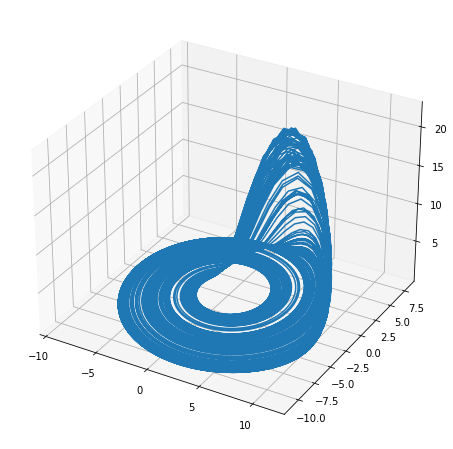

In [2]:
data_length = 100000
step = 0.1
scale = 1
r_t = lambda x: r_t_const(x)
dx_dt = lambda x, time, r_t: dxdt_rossler(x, time, r_t, scale = scale)
rossler_data = getRosslerData(data_length, r_t, dx_dt, tau = step, sample_tau = step)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
ax.plot3D(rossler_data[:10000,0],rossler_data[:10000,1],rossler_data[:10000,2])
plt.show()

In [3]:
slow_min = np.min(rossler_data[:,1])
slow_max = np.max(rossler_data[:,1])
slow_var = 48/28
rossler_scaling = (rossler_data[:,1]-(slow_max+slow_min)/2)/(slow_max-slow_min)*(slow_var-1)+(1+(slow_var-1)/2)
print(np.min(rossler_scaling))
print(np.max(rossler_scaling))

1.0
1.7142857142857144


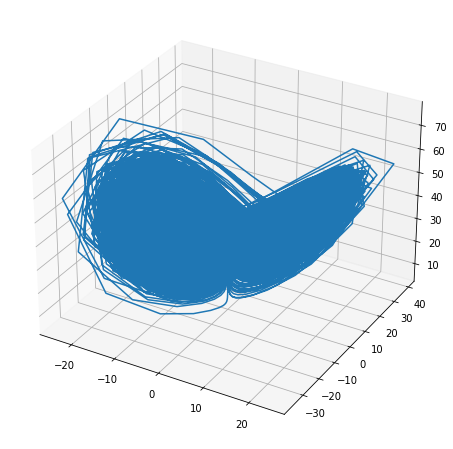

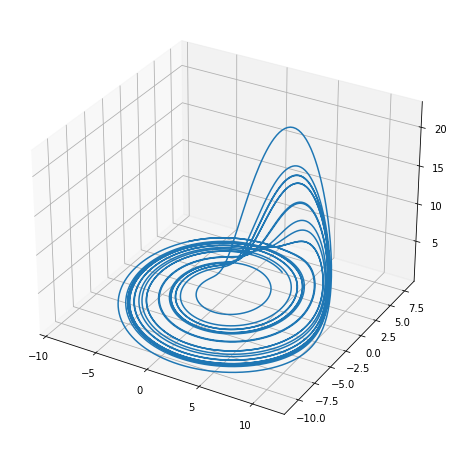

In [4]:
data_length = 100000
step = 0.05
f_s = 1/step
scale = 0.25
r_t = lambda x: r_t_const(x)
dx_dt = lambda x, time, r_t: dxdt_lorenz_rossler(x, time, r_t, scale = scale)
lorenz_data_coupled = getCoupledLorenzData(data_length, r_t, dx_dt, sample_tau = step)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
ax.plot3D(lorenz_data_coupled[:10000,0],lorenz_data_coupled[:10000,1],lorenz_data_coupled[:10000,2])
plt.show()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
ax.plot3D(lorenz_data_coupled[:10000,3],lorenz_data_coupled[:10000,4],lorenz_data_coupled[:10000,5])
plt.show()

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
ax.plot3D(lorenz_data_coupled[50000:,0], lorenz_data_coupled[50000:,1], lorenz_data_coupled[50000:,2])
plt.show()

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
ax.plot3D(lorenz_data_coupled[50000:,3], lorenz_data_coupled[50000:,4], lorenz_data_coupled[50000:,5])
plt.show()

plt.plot(lorenz_data_coupled[50000:,0])
plt.show()

In [ ]:
var = 1
nperseg = 20000

f_s = 1/step
freqs, X = welch(lorenz_data_coupled[:,var], f_s, nperseg = nperseg, scaling = 'density')
print(X.shape)
print(freqs.shape)
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, 10)
ax.set_ylim(0, 1000)

freqs1, X1 = welch(lorenz_data_fast[:,var], f_s,  nperseg = nperseg)
print(X1.shape)
print(freqs1.shape)
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(freqs1, np.abs(X1))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, 10)
ax.set_ylim(0, 1000)

# freqs2, X2 = welch(lorenz_data_slow[:,var], f_s,  nperseg = nperseg)
freqs2, X2 = periodogram(lorenz_data_slow[:,var], f_s)
print(X2.shape)
print(freqs2.shape)
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(freqs2, np.abs(X2))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, 1)
# ax.set_ylim(0, 3000)

fig, ax = plt.subplots(figsize = (8,8))

ax.plot(freqs, np.abs(X1)-np.abs(X))
ax.plot(freqs2, np.abs(X2)/100)
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, 1)
ax.set_ylim(-100, 100)

In [ ]:
Ws = 0.19
from scipy.signal import butter, sosfilt
sos = butter(10, Ws, 'lowpass', fs = f_s, output = 'sos')
filtered_data = sosfilt(sos, lorenz_data_coupled, axis = 0)
sos2 = butter(10, Ws, 'highpass', fs = f_s, output = 'sos')
filtered_data_2 = sosfilt(sos2, lorenz_data_coupled, axis = 0)

In [ ]:
var = 2
plt.plot(lorenz_data_coupled[2000:3000,var] - filtered_data[2000:3000,var])
plt.show()
plt.plot(lorenz_data_coupled[2000:3000,var])
plt.show()

In [ ]:
nperseg = 20000

f_s = 1/step
freqs, X = welch(filtered_data[:,var], f_s, nperseg = nperseg, scaling = 'density')
freqs2, X2 = welch(filtered_data_2[:,var], f_s, nperseg = nperseg, scaling = 'density')
freqs3, X3 = welch(lorenz_data_coupled[:,var], f_s, nperseg = nperseg, scaling = 'density')
freqs4, X4 = welch(lorenz_data_fast[:,var], f_s, nperseg = nperseg, scaling = 'density')
print(X.shape)
print(freqs.shape)
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(freqs, np.abs(X))
ax.plot(freqs2, np.abs(X2))
ax.plot(freqs3, np.abs(X3))
#ax.plot(freqs4, np.abs(X4))

ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, 0.5)
ax.set_ylim(0, 500)

In [ ]:
print(freqs[X == np.max(X)])

In [ ]:
data_length = 1000000
betas = np.array([0.1, 8/3])
sigmas = np.array([2.1,10])
rhos = np.array([16,28])
lorenz_data = np.array([])
step = 0.005
f_s = 1/step
top_freqs = []
for beta, sigma, rho in zip(betas, sigmas, rhos):
    r_t = lambda x: r_t_const(x)
    dx_dt = lambda x, time, r_t: dxdt_lorenz(x, time, r_t, beta = beta, sigma = sigma, rho = rho)
    if lorenz_data.size == 0:
        lorenz_data = getLorenzData(data_length, r_t, dx_dt, tau = step, sample_tau = step).reshape(-1,3,1)
    else:
        lorenz_data = np.append(lorenz_data, getLorenzData(data_length, r_t, \
            dx_dt, tau = step, sample_tau = step).reshape(-1,3,1), axis = 2)
    freqs, X = periodogram(lorenz_data[:,2,-1], f_s)
    fig = plt.figure(figsize = (8,8))
    plt.plot(freqs,X)
    plt.xlim(0,3)
    plt.show()
    best_freq = freqs[X == np.max(X)]
    top_freqs.append(best_freq)
    print(beta)
print(top_freqs)

In [ ]:
itr = 0
for beta, sigma, rho in zip(betas, sigmas, rhos):
    freqs, X = periodogram(lorenz_data[:,1,itr], f_s)
    fig = plt.figure(figsize = (8,8))
    plt.plot(freqs,X)
    plt.xlim(0,3)
    plt.show()
    itr +=1

In [ ]:
fig = plt.figure(figsize = (9,9))
ax = plt.axes(projection = '3d')
ax.plot3D(lorenz_data[:40000,0],lorenz_data[:40000,1],lorenz_data[:40000,2])
plt.show()

plot_len = 5000
plt.plot(np.arange(plot_len)*step, lorenz_data[:plot_len,2])
plt.plot(np.arange(plot_len)*step, lorenz_data_base[:plot_len,2])
plt.show()

plt.plot(np.arange(plot_len)*step, lorenz_data[:plot_len,0])
plt.plot(np.arange(plot_len)*step, lorenz_data_base[:plot_len,0])
plt.show()

In [ ]:
print(np.min(lorenz_data[:,2]))
print(np.max(lorenz_data[:,2]))
print(np.mean(lorenz_data[:,2]))

In [ ]:
lyapunov_dim = 3 - 2*(sigma + beta + 1)/(sigma + 1 + np.sqrt((sigma-1)**2+4*sigma*rho))
print(lyapunov_dim)

In [ ]:
r_t = lambda x: r_t_const(x)
dx_dt = lambda x, time, r_t: dxdt_lorenz_2scale(x, time, r_t)
data_length = 1000000
step = 0.005
lorenz_data_2scale = get2ScaleLorenzData(data_length, r_t, dx_dt, tau = step, sample_tau = step)

In [ ]:
f_s = 1/step
freqs, X = periodogram(lorenz_data_2scale[:,1], f_s)
freqs2, X2 = periodogram(lorenz_data_2scale[:,5], f_s)

fig = plt.figure(figsize = (8,8))
plt.plot(freqs, X)
plt.plot(freqs2, X2)
plt.xlim(0,3)
plt.show()

In [ ]:
print(np.min(lorenz_data_2scale[:,0]))
print(np.max(lorenz_data_2scale[:,0]))
print(np.min(lorenz_data_2scale[:,1]))
print(np.max(lorenz_data_2scale[:,1]))
print(np.min(lorenz_data_2scale[:,2]))
print(np.max(lorenz_data_2scale[:,2]))

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = p3.Axes3D(fig)
line1, = ax.plot3D([],[],[],lw = 2, color = 'red')
line2, = ax.plot3D([],[],[],lw = 2, color = 'blue')
num_frames = lorenz_data_2scale.shape[0]

def init(ax, line1, line2,data):
    ax.set_xlim(0,3)
    ax.set_ylim(-2,2)
    ax.set_zlim(-13,13)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    line1.set_data(data[:2,:3])
    line2.set_data(data[:2,3:])
    return line1, line2,

def animate(i, line1, line2, data):
    line1.set_data(data[:i,:3])
    line2.set_data(data[:i,3:])
    return line1, line2,

init_fun = lambda : init(ax, line1, line2, lorenz_data_2scale)
update = lambda i: animate(i, line1, line2, lorenz_data_2scale)

anim = FuncAnimation(fig, update, frames = np.arange(2,num_frames), init_func = init_fun, blit = False)
anim.save('coupled_lorenz.gif')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation




def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure(figsize = (10,10))
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [lorenz_data_2scale[:,:3].T, lorenz_data_2scale[:,3:].T]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([-26, 26])
ax.set_xlabel('X')

ax.set_ylim3d([-38, 38])
ax.set_ylabel('Y')

ax.set_zlim3d([-15, 75])
ax.set_zlabel('Z')

ax.set_title('3D Test')
num_frames = 1000
# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, frames = np.arange(2,num_frames), fargs=(data, lines),
                                   interval=50, blit=True)

line_ani.save('3dtest.gif')

plt.show()

In [ ]:
np.random.randint(1,12,3)